In [1]:
# Useful starting lines
import numpy as np
from helpers import *
from methods import *

%load_ext autoreload
%autoreload 2

seed=20

# Load the dataset

In [2]:
y, tX, ids = load_csv_data('Data/train.csv')
_, tX_test, ids_test = load_csv_data('Data/test.csv')

# Preprocessing

### Umbalanced Dataset

In [3]:
higgs = np.count_nonzero(y==1)
print(f'From {y.shape[0]} training examples, {higgs} are 1, i.e. the {higgs/y.shape[0]} %')

From 250000 training examples, 85667 are 1, i.e. the 0.342668 %


IDEA: We could use Undersampling\Oversampling alghoritms

### Manage missing values

In [4]:
tX, tX_test = missing_values(tX, tX_test)

SUPERIDEA: SLIT THE DATASET IN 4 CLASSES

### Standardization

In [5]:
tX, mean_tX, std_tX = standardize(tX)
tX_test, _, _ = standardize(tX, mean_tX, std_tX)

### Other Ideas

1. New features: Apply a polynomial basis to all the X features

2. PCA, correlation analysis (scatterplot, VIF, ...), manage the 0s in the last feature

3. Outlayer analysis, leverages, cook's metric ...

In [6]:
tX, tX_test = process_data(tX, tX_test, True)

# Methods

## 1. Least Squares with Gradient Descent

In [7]:
loss, weights = gradient_descent(y,tX,1000,0.01)

# it shoud be in this form
# loss, weights = least_squares_GD(y, tx, initial w, max_iters, gamma)

Gradient Descent(0/999): loss=12.254705158925876
Gradient Descent(100/999): loss=0.5633491182327879
Gradient Descent(200/999): loss=0.40414378316478344
Gradient Descent(300/999): loss=0.36957250660141455
Gradient Descent(400/999): loss=0.35677961402023217
Gradient Descent(500/999): loss=0.35049394874542145
Gradient Descent(600/999): loss=0.3469351825519043
Gradient Descent(700/999): loss=0.34476375807614495
Gradient Descent(800/999): loss=0.34337555573620887
Gradient Descent(900/999): loss=0.342457221494706


## 2. Least Squares with Stochastic Gradient Descent

In [8]:
# yet to be implemented
# least_squares_SGD(y, tx, initial w, max_iters, gamma)

## 3. Least Squares with Normal Equations 

In [9]:
loss, weights = least_squares(y, tX)

## 4. Ridge regression with Normal Equations

In [105]:
loss, weights = ridge_regression(y, tX, 0.2)

## 5. Logistic Regression with Stochastic Gradient Descent
DOESN'T WORK, WHY?


In [ ]:
loss, weights = logistic_regression_gradient_descent(y, tX)

# it shoud be in this form
# loss, weights = logistic regression_SGD(y, tX, initial w, max_iters, gamma)
# and we should use SGd rather than GD because it's more efficient

## 6. Regularized Logistic Regression with Stochastic Gradient Descent

In [91]:
# yet to be implemented
# loss, weights = reg_logistic regression_SGD(y, tX, initial w, max_iters, gamma)

# Cross Validation
IDEA: insert CV in each of the methods above

0
3.3995413986193554 3.400581113583601
1
3.3995414925438916 3.400581095671064
2
3.3995416004577677 3.40058108377057
3
3.399541724438433 3.4005810793984605
4
3.3995418668704396 3.400581084339863
5
3.3995420304905317 3.400581100691321
6
3.3995422184392714 3.400581130909858
7
3.399542434320157 3.4005811778693538
8
3.399542682267282 3.4005812449253607
9
3.3995429670227706 3.400581335989523
10
3.399543294025345 3.4005814556150042
11
3.3995436695116084 3.4005816090944823
12
3.3995441006318394 3.400581802572483
13
3.399544595582303 3.4005820431741283
14
3.39954516375639 3.4005823391525447
15
3.3995458159172047 3.4005827000575573
16
3.3995465643945253 3.4005831369286827
17
3.399547423309584 3.4005836625098804
18
3.399548408830984 3.4005842915305955
19
3.3995495394673574 3.4005850409353315
20
3.399550836399396 3.4005859302699633
21
3.3995523238588916 3.4005869820268946
22
3.3995540295596 3.4005882220772214
23
3.399555985187277 3.4005896801561595
24
3.3995582335140493 3.4005913900989193
25
3.399

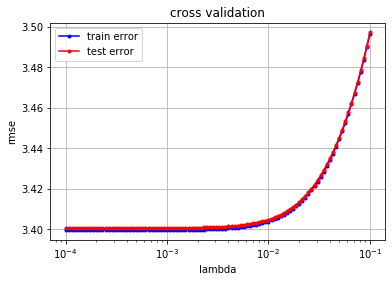

In [10]:
loss, weights, best_lambda = cross_validation_demo(y,tX)

# Prediction

#### Generate predictions and save ouput in csv format for submission

In [107]:
OUTPUT_PATH = 'data/FIRSTsubmission.csv' 
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

ATTENTION: we are prediction too LESS 1

In [108]:
higgs = np.count_nonzero(y_pred==1)
print(f'From {y_pred.shape[0]} test examples, {higgs} are 1, i.e. the {higgs/y_pred.shape[0]} %')

From 250000 test examples, 8814 are 1, i.e. the 0.035256 %
